In [1]:
import os

In [2]:
%pwd

'c:\\Users\\frup00090410\\Mlops_project\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'c:\\Users\\frup00090410\\Mlops_project'

In [5]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import pickle
import pandas as pd



In [9]:
def predict(text):

    # load model
    model = load_model(os.path.join('artifacts/model_training/', 'model.h5'))
    # Load tokenizer
    with open('artifacts/data_preprocessing/tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    # Target class
    target_names = ["Bank Account services", "Credit card or prepaid card",\
                        "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]
    # raw text

    text_sequences = tokenizer.texts_to_sequences([text])
    text_tfidf = tokenizer.sequences_to_matrix(text_sequences, mode="tfidf")
    predicted = model.predict(text_tfidf)

    return target_names[np.argmax(predicted[0])]
            

In [10]:
a = predict("Yesterday, I received a fraudulent email regarding renewal of my services.")
a

1/1 [==============================] - 0s 126ms/step


'Theft/Dispute Reporting'

In [11]:
a[0]

'T'

In [12]:
# Create a dataframe of some sample customer complaints
df_new = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})
df_new

,complaints
0,I can not get from chase who services my mortg...
1,The bill amount of my credit card was debited ...
2,I want to open a salary account at your downto...
3,"Yesterday, I received a fraudulent email regar..."
4,What is the procedure to know my CIBIL score?
5,I need to know the number of bank branches and...


In [14]:
df_new['predicted topic'] = df_new['complaints'].apply(lambda x: predict(x))
df_new

1/1 [==============================] - 0s 95ms/step


,complaints,predicted topic
0,I can not get from chase who services my mortg...,Others
1,The bill amount of my credit card was debited ...,Credit card or prepaid card
2,I want to open a salary account at your downto...,Bank Account services
3,"Yesterday, I received a fraudulent email regar...",Theft/Dispute Reporting
4,What is the procedure to know my CIBIL score?,Credit card or prepaid card
5,I need to know the number of bank branches and...,Bank Account services


In [15]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [16]:
# Create a function to evaluate models
def eval_model(y_test, y_pred, model_name):
    """
    This function prints the classification report of a classifier 
    and plots the confusion martrix
    :param y_test: actual labels
    :param y_pred: predicted labels
    :param model_name: the name of the model being evaluated
    :return: None
    """
    
    # print classification report of classifier
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"]))
    
    # plot confusion matrix of the classifier
    plt.figure(figsize=(10,6))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"])
    plt.show()
    
    return

CLASSIFICATION REPORT for mlp

                             precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00         2
Credit card or prepaid card       1.00      0.50      0.67         2
                     Others       0.00      0.00      0.00         0
    Theft/Dispute Reporting       0.00      0.00      0.00         1
              Mortgage/Loan       1.00      1.00      1.00         1

                   accuracy                           0.67         6
                  macro avg       0.60      0.50      0.53         6
               weighted avg       0.83      0.67      0.72         6



c:\Users\frup00090410\Mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frup00090410\Mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frup00090410\Mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frup00

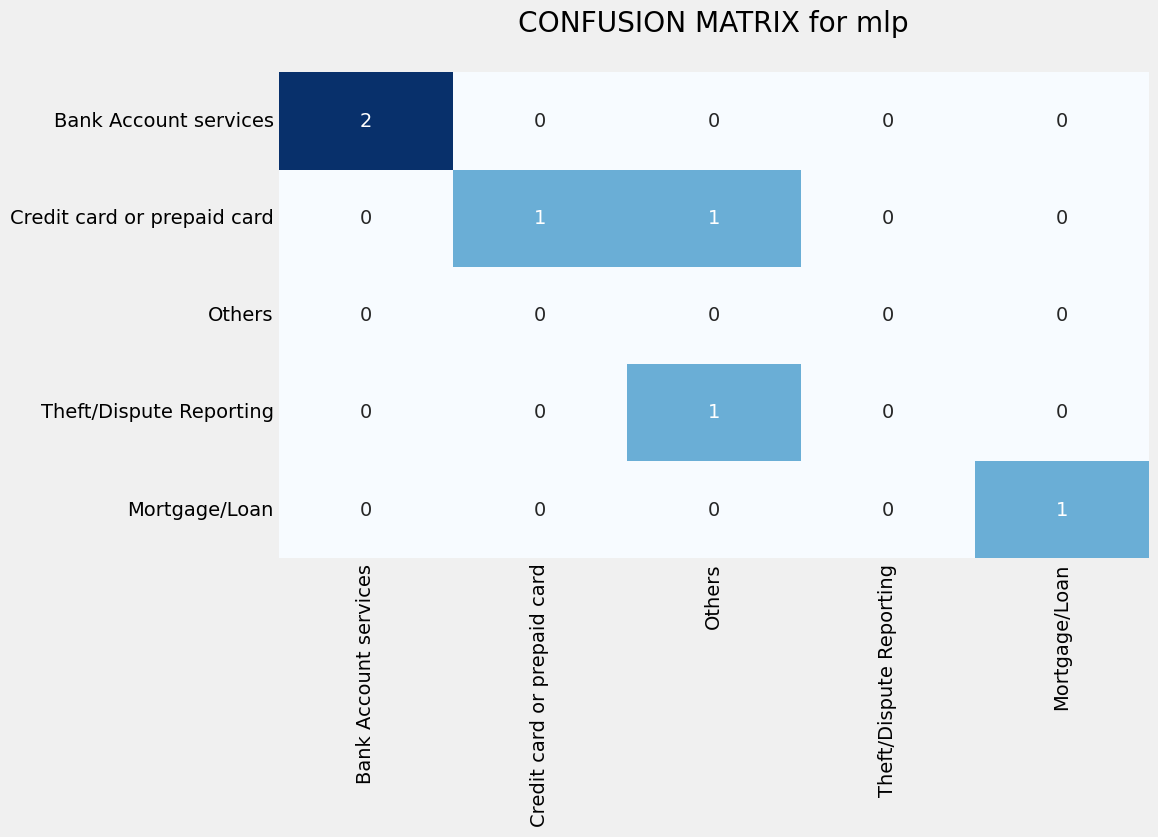

In [17]:
eval_model(df_new['predicted topic'], ["Mortgage/Loan", "Credit card or prepaid card","Bank Account services",\
                                        "Theft/Dispute Reporting","Mortgage/Loan", "Bank Account services"], \
                                            "mlp")